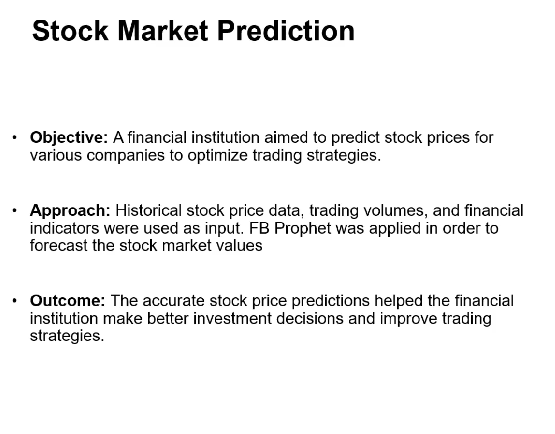

In [1]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


c:\Users\HP\Desktop\Interview Prep\AI Engineer\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Reading the data

df= pd.read_csv('Tesla.csv')
df.head()


,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [5]:
# Check for missing value

missing_values= df.isnull().sum()

# Basic statistical details
statistics= df.describe()

missing_values, statistics

(Date         0
 Open         0
 High         0
 Low          0
 Close        0
 Volume       0
 Adj Close    0
 dtype: int64,
               Open         High  ...        Volume    Adj Close
 count  1692.000000  1692.000000  ...  1.692000e+03  1692.000000
 mean    132.441572   134.769698  ...  4.270741e+06   132.428658
 std      94.309923    95.694914  ...  4.295971e+06    94.313187
 min      16.139999    16.629999  ...  1.185000e+05    15.800000
 25%      30.000000    30.650000  ...  1.194350e+06    29.884999
 50%     156.334999   162.370002  ...  3.180700e+06   158.160004
 75%     220.557495   224.099999  ...  5.662100e+06   220.022503
 max     287.670013   291.420013  ...  3.716390e+07   286.040009
 
 [8 rows x 6 columns])

The dataset doesnot have any missing values which is great. This means we wont need to perform any data imputation.

Here are some basic statistics about the dataset:

- The dataset contains 1692 records. For the Open, high, Low, Close, and Adj Close prices, the mean values are around 132.

- The standard deviation is quite high at around 94, indicating significant variability in Tesla's stock prices over this period.

- The minimum price in the dataset is around 15, and the maximum price is around 286.This shows growth of Teslas stock over time.

- The Volume field, which represents the number of shares traded, varies significantly, with a minimum of 118,500 and a maximum of 37,163,900.

Now, let's create some visualisations to better understand the data. We'll plot the closing price over time and trading volume over time. This will give us sense od how these quantites have changed over the period covered by the dataset.

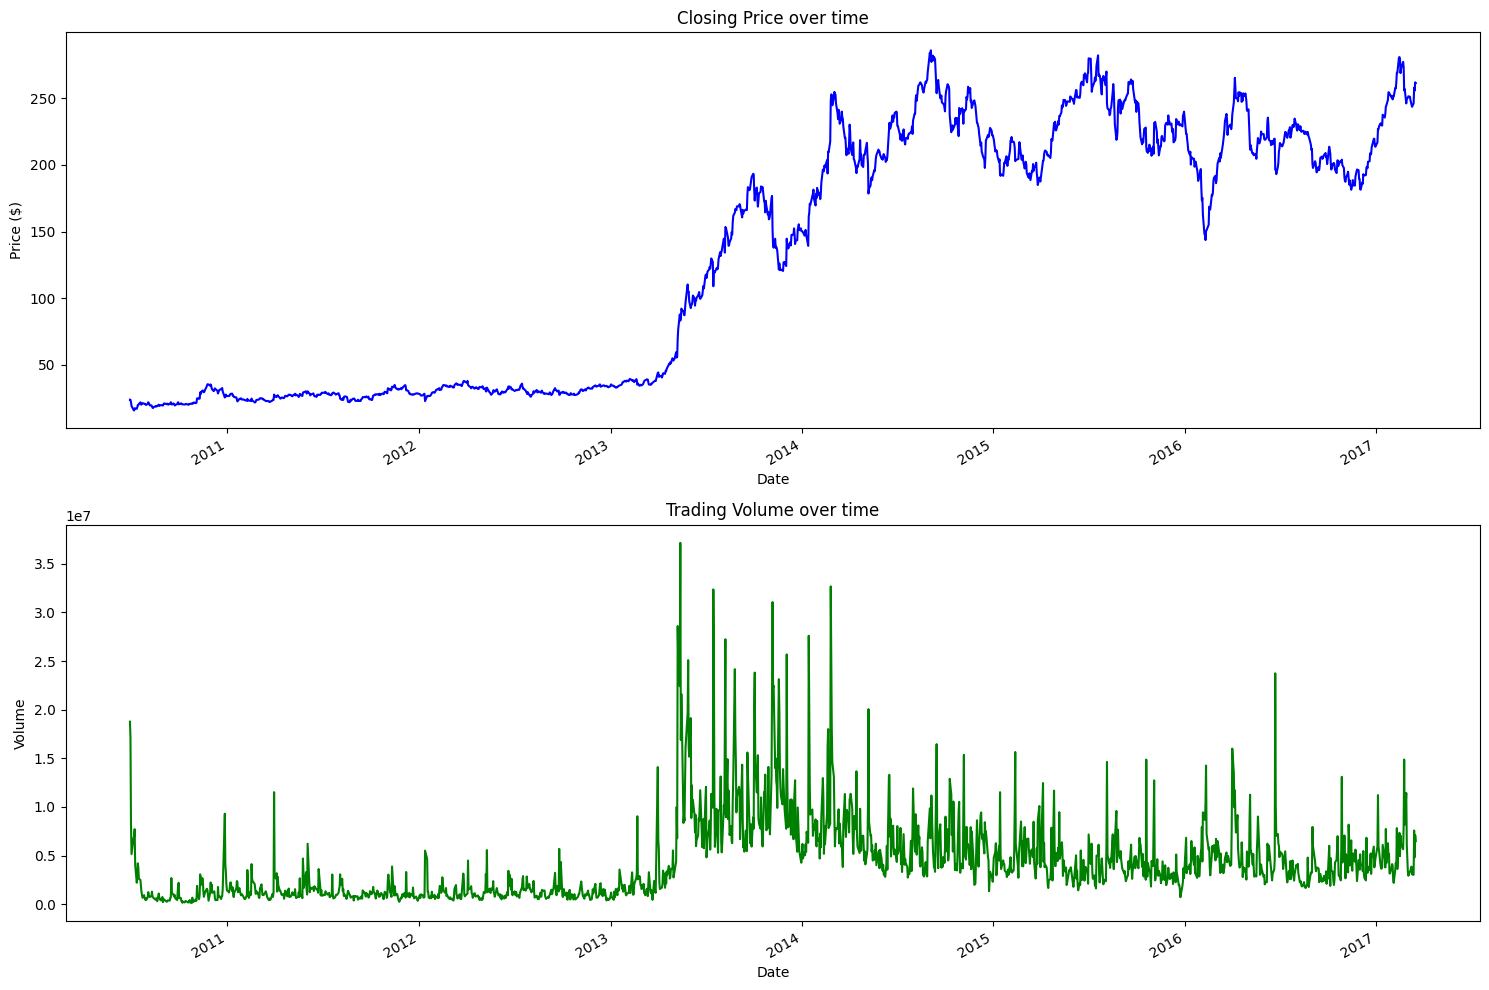

In [6]:
# Convert the date column to datetime format
df['Date']= pd.to_datetime(df['Date'])

# Set the date as index of df for plotting
df.set_index('Date', inplace=True)

# Create a figure and set of subplots
fig, ax = plt.subplots(nrows =2, ncols=1, figsize=(15,10))

# Plot the closing price over time
df['Close'].plot(ax=ax[0], color='blue')
ax[0].set_title('Closing Price over time')
ax[0].set_ylabel('Price ($)')

# Plot the trading volume over time
df['Volume'].plot(ax=ax[1], color='green')
ax[1].set_title('Trading Volume over time')
ax[1].set_ylabel('Volume')

# Improve Layout
plt.tight_layout()
plt.show()


These plots provide a visual representation of how Teslas closing price and trading volume have chnaged over time. 

- Closing Price over time - This plot shows that the closing price of Tesla stocks has generally increased over time, with some points of significant growths and occasional declines. This is typical of stock price data , which can be quite volatile.

- Trading Volume Over Time - This plot shows how trading volume (No. of shares traded) has changed over time. There are some periods with particularly high trading volumes, which may correspond to significant events or announcemnets related to Tesla.

Now that we've done a basic analysis of the data, let's proceed to the forecasting part. We'll use Facebook Prophet library for this. Prophet is a powerful tool for time series forecasting, and it can handle trends, seasonality, and holidays, which can affect stock prices.

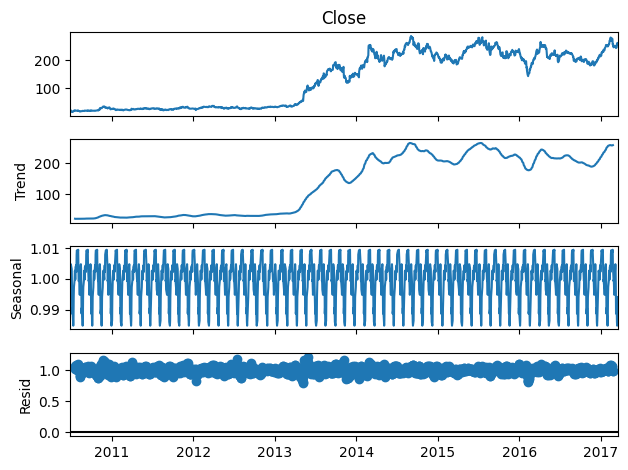

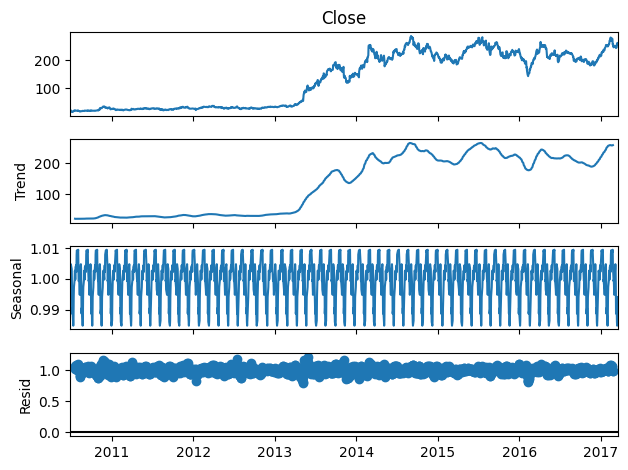

In [7]:
# Seasonality Analysis

decomposition = seasonal_decompose(df['Close'],model='multiplicative',period=30)
decomposition.plot()

The seasonal decomposition of the closing prices of Tesla's stock reveal the following:

- Trend: The trend component shows a general upward trend in Tesla's stock prices over the years, with some periods of decline. This indicates long term movement of Tesla's stock prices is upwards.

- Seasonality: Some minor fluctuations suggest some recurring patterns that might occur on the monthly basis.

- Residuals: The residuals (the variation in the stock price not explained by trend or seasonality) appear to have increased over the time, increasing volatility or unpredictability in Tesla's stock prices.

Next, let's perform a volatility analysis. This will provide insight into how much the returns (percentage change in price) fluctuate over the time. This fluctuation is a measure of the risk or uncertainty about the returns of the stock. A higher volatility means the price of the stock can change dramatically over a short time period in either direction, while lower volatility means that a stock's value does not fluctuate dramatically, but changes in value at a steady pace over a period of time.

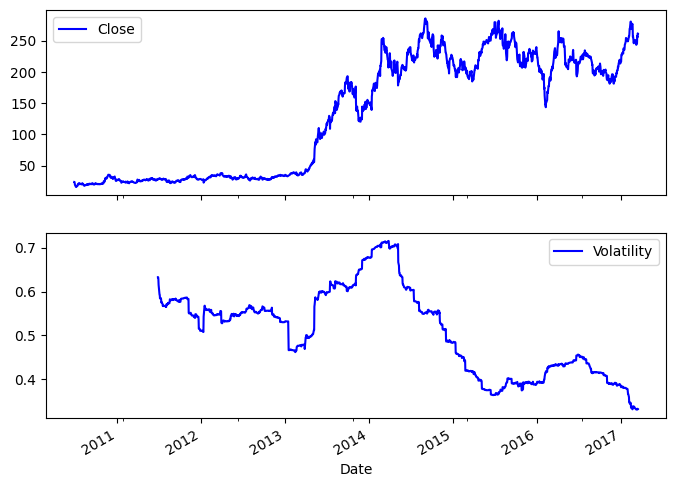

In [8]:
# Volatility Analysis

df['Return'] = df['Close'].pct_change()
df['Volatility']=df['Return'].rolling(window=252).std()* np.sqrt(252)

#252 trading days ( sat-sun ignored)

df[['Close','Volatility']].plot(subplots=True, color='blue', figsize= (8,6))
plt.show()

The volatility analysis provides the following insights:

- Closing Prices: As seen before in the trend component of the seasonal decomposition, the closing prices of Tesla's stock show a general upward trend over time, with some periods of decline.

- Volatility: The volatility, or the degree of variation in the returns of the stock over time, appears to have several peaks. This means there are periods when the returns change dramatically, indicating high risk or uncertainty during those periods. It's important to note that high volatility periods are not necessarily tied to drops in the stock price; they represent periods of significant price change in either direction.

Next, we'll perform a moving average analysis. The moving average is often used to identify trend direction and to smooth out price and volume fluctuations (or "noise") that can confuse interpretation. In this case, we'll calculate and plot the 10-day and 50-day moving averages along with the closing prices. The 10-day moving average gives us a short-term trend direction, while the 50-day moving average gives a longer-term trend direction.

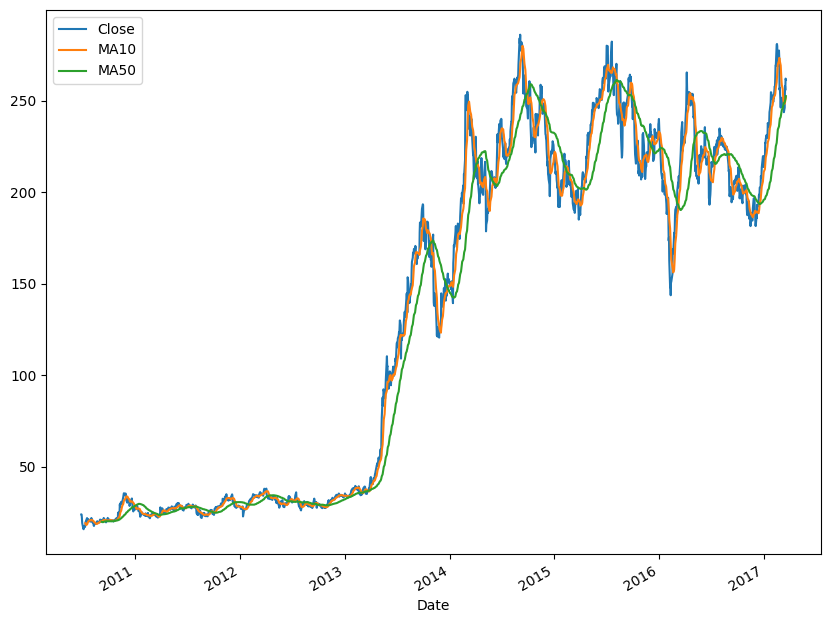

In [9]:
# Moving Average Analysis

df['MA10'] = df['Close'].rolling(window=10).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()
df[['Close','MA10','MA50']].plot(label='Tesla', figsize=(10,8))

plt.show()

The moving average analysis yields the following insights:

- Closing Prices: As previously observed, the closing prices of Tesla's stock have a general upward trend over time, with some periods of decline.

- 10-Day Moving Average (MA10): The 10-day moving average shows the short-term trend of Tesla's stock price. When the closing price is above the 10-day moving average, it may indicate an upward trend in the short term, and vice versa.

- 50-Day Moving Average (MA50): The 50-day moving average shows the longer-term trend of Tesla's stock price. When the closing price is above the 50-day moving average, it may indicate an upward trend in the long term, and vice versa.

One common strategy used by some traders is to look for crossings of different moving averages as a signal for potential buying or selling opportunities. For example, when the MA10 crosses above the MA50 (a "bullish crossover"), it could be seen as a buy signal, as it indicates that the short-term trend is moving upwards faster than the long-term trend. Conversely, when the MA10 crosses below the MA50 (a "bearish crossover"), it could be seen as a sell signal.

Next, let's analyze the returns of the stock. This will give us an idea of how much the stock price changes from day to day. A positive return means the stock price increased, while a negative return means it decreased.


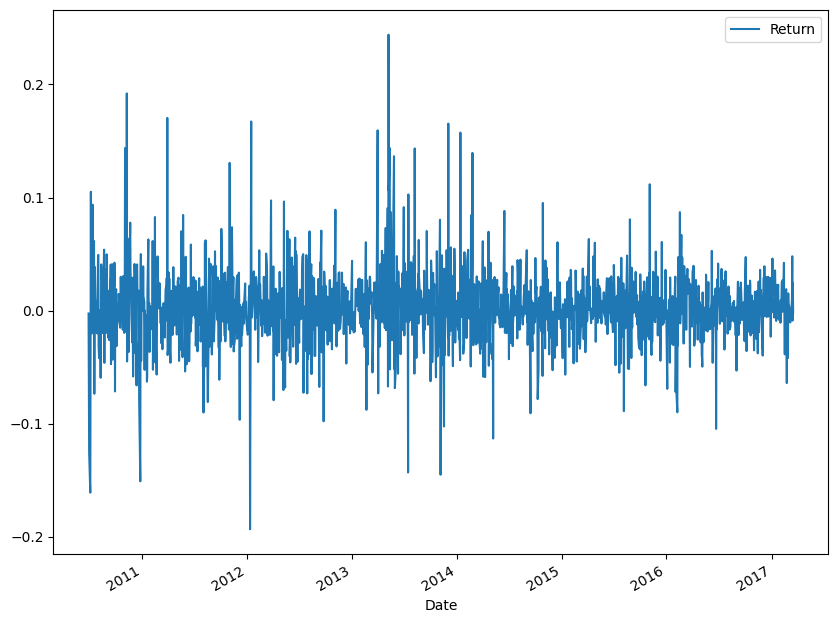

In [10]:
# Return Analysis

df['Return'] = df['Close'].pct_change()
df[['Return']].plot(label='Return',figsize=(10,8))
plt.show()

The return analysis chart illustrates the daily percentage change in Tesla's stock price. Here are some observations:

- Return: The daily return fluctuates around 0, with a mix of positive and negative returns. This indicates that the stock price has days of both gains and losses.

- The magnitude of these daily returns provides some indication of the stock's volatility. Larger swings (both up and down) indicate more volatility. As seen in the chart, there are periods with higher volatility (larger fluctuations in returns) and periods with lower volatility (smaller fluctuations in returns).

- Some extreme spikes represent days with particularly significant price changes. These might be related to specific events, such as earnings announcements, changes in the broader market, or other news related to the company or its industry.

- Remember, a positive return means the stock price increased from the previous day, while a negative return means it decreased.

For forecasting with Prophet, we need to prepare the data in a specific format. The dataframe should have two columns: ds and y. The ds (datestamp) column should contain the dates, and the y column should contain the values we want to predict or forecast (in this case, the Close price). So, let's prepare the data accordingly.

In [11]:
# Prepare the data for prophet

prophet_df= df.reset_index()[['Date','Close']]
prophet_df.rename(columns = {'Date':'ds','Close':'y'}, inplace=True)

prophet_df.head()

,ds,y
0,2010-06-29,23.889999
1,2010-06-30,23.830000
2,2010-07-01,21.959999
3,2010-07-02,19.200001
4,2010-07-06,16.110001


22:13:57 - cmdstanpy - INFO - Chain [1] start processing
22:13:58 - cmdstanpy - INFO - Chain [1] done processing


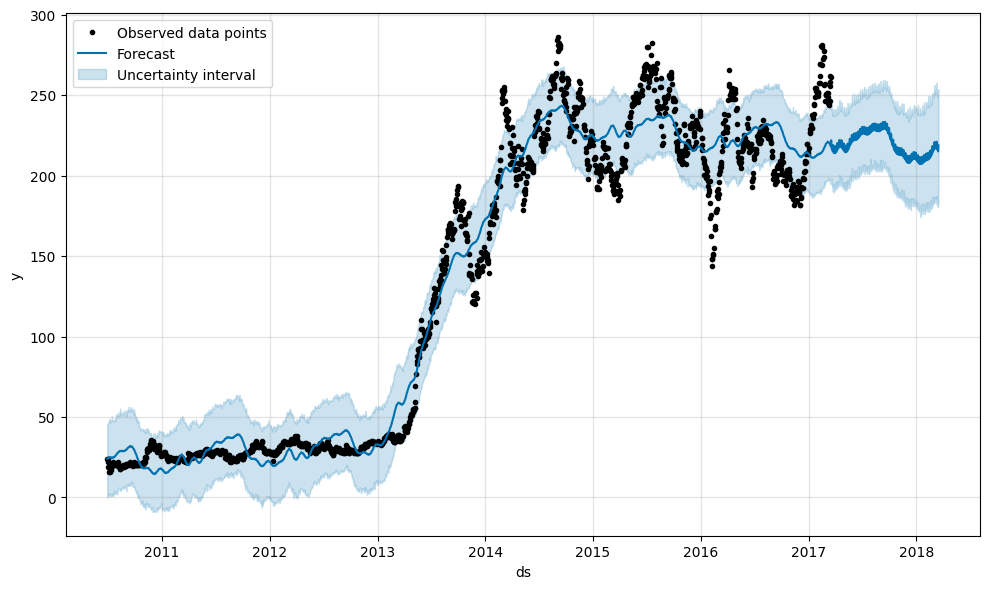

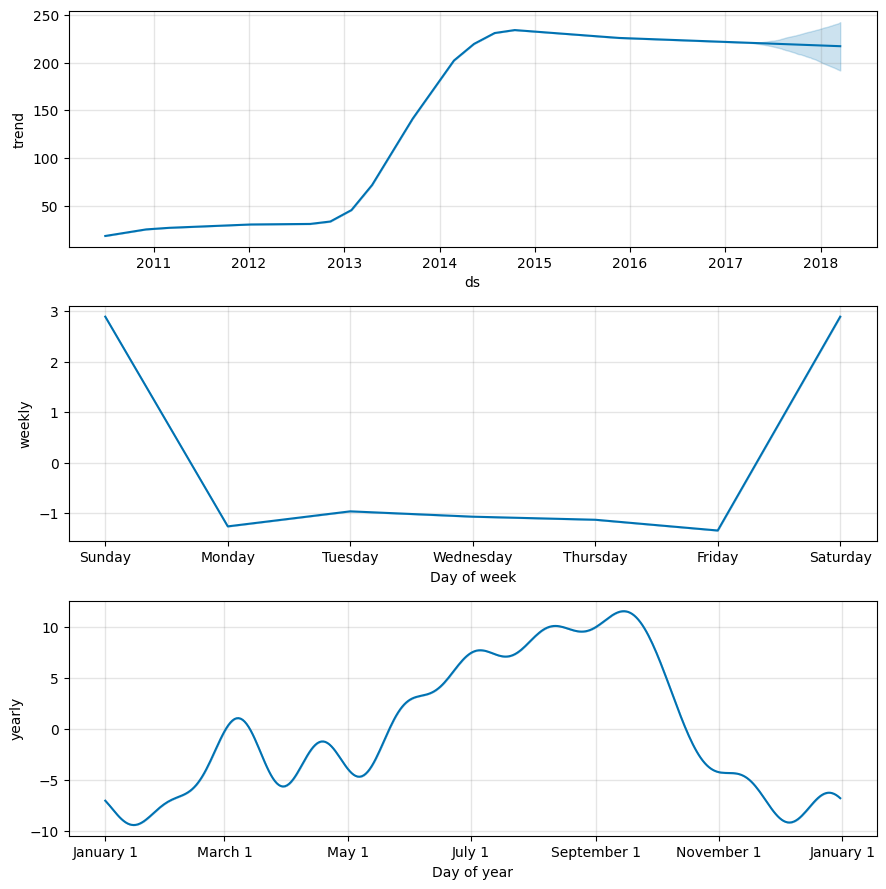

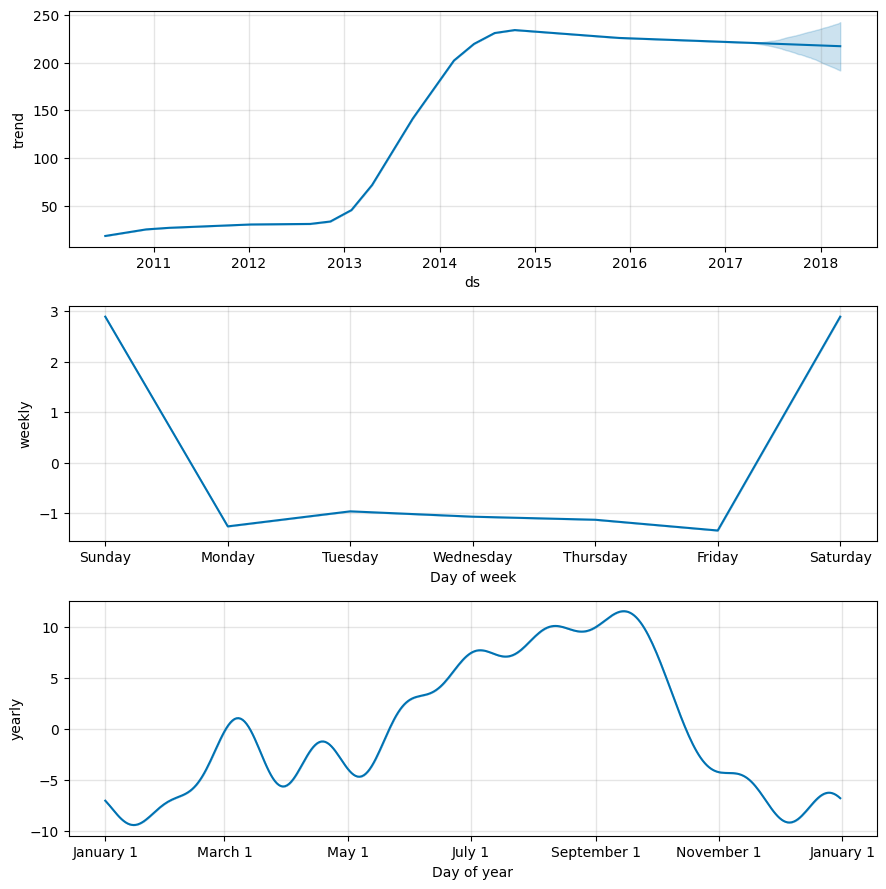

In [13]:
# Initialise the prophet model
model = Prophet()

# Fit the model
model.fit(prophet_df)

# Specify the number of days for predictions
future = model.make_future_dataframe(periods=365)

# Use the model to make predictions
forecast = model.predict(future)

# Visulaise the forecast
model.plot(forecast, include_legend=True)
plt.show()

# Components of forecast visulaisation
model.plot_components(forecast)